In [ ]:
#参考链接https://blog.csdn.net/alwaysluc/article/details/124673115
#https://zhuanlan.zhihu.com/p/106982034

In [1]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel('lda词汇.xlsx')

In [4]:
data=data[0]

In [5]:
data

0         酒店
1         孩子
2         大人
3          床
4        卫生间
        ... 
92492     线板
92493     蜡烛
92494     台灯
92495     饮料
92496     甜汤
Name: 0, Length: 92497, dtype: object

In [6]:
data_list=[]
for ele in data:
    data_list.append([str(ele)])

In [7]:
len(data_list)

92497

In [8]:
dictionary=corpora.Dictionary(data_list)

In [9]:
corpus = [dictionary.doc2bow(text) for text in data_list]

In [10]:
lda=LdaModel(corpus =corpus,id2word=dictionary,num_topics=8,passes=100)

In [11]:
for topic in lda.print_topics(num_words = 20):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')


0:
  "人" (0.112)
  "棒" ( 0.107)
  "阿姨" ( 0.065)
  "位置" ( 0.056)
  "亲子" ( 0.049)
  "空调" ( 0.048)
  "皮划艇" ( 0.025)
  "大床" ( 0.023)
  "热" ( 0.022)
  "疫情" ( 0.022)
  "绿豆汤" ( 0.020)
  "厕所" ( 0.018)
  "设备" ( 0.018)
  "屋" ( 0.017)
  "户外" ( 0.017)
  "携程" ( 0.016)
  "小哥" ( 0.014)
  "微信" ( 0.014)
  "电话" ( 0.014)
  "景色"( 0.013)
1:
  "环境" (0.407)
  "电瓶车" ( 0.063)
  "停车场" ( 0.047)
  "活动" ( 0.037)
  "小姐" ( 0.032)
  "乐园" ( 0.026)
  "生态" ( 0.019)
  "蛮" ( 0.019)
  "情况" ( 0.016)
  "套餐" ( 0.016)
  "风格" ( 0.015)
  "小院" ( 0.014)
  "路" ( 0.012)
  "需求" ( 0.012)
  "楼" ( 0.010)
  "五脏" ( 0.009)
  "电视" ( 0.008)
  "城市" ( 0.007)
  "朋友们" ( 0.007)
  "粥"( 0.006)
2:
  "房车" (0.300)
  "早餐" ( 0.169)
  "帐篷" ( 0.070)
  "交通" ( 0.031)
  "水" ( 0.029)
  "行李" ( 0.029)
  "服务员" ( 0.024)
  "天气" ( 0.023)
  "家" ( 0.019)
  "宝宝" ( 0.017)
  "早饭" ( 0.016)
  "品种" ( 0.016)
  "儿童" ( 0.016)
  "区" ( 0.013)
  "真心" ( 0.011)
  "特色" ( 0.010)
  "氛围" ( 0.009)
  "泡泡" ( 0.006)
  "拖鞋" ( 0.006)
  "好去处"( 0.006)
3:
  "房间" (0.257)
  "卫生" ( 0.098)
  "车" (

# 困惑度计算

In [27]:
import gensim
from gensim import corpora, models
import matplotlib.pyplot as plt
import matplotlib
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer


In [28]:
path='lda.txt'

In [31]:

file_object2=open(path,encoding = 'utf-8',errors = 'ignore').read().split('\n')  
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()  #读取没一行文本
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
print(data_set[:10])  #输出所有分词列表


[['酒店', '孩子', '大人', '床', '卫生间', '灯', '蚊子', '位置', '大海', '车', '差'], ['家人', '木屋', '房车'], ['太阳', '斜', '帐篷'], ['差', '清洁费'], ['孩子', '碰碰车', '儿童', '乐园', '水库', '娱乐性', '房型', '湖边', '小屋', '星空', '帐篷', '房车', '房间', '设施', '空调', '山里', '寒舍', '娃'], ['天光', '白头'], ['民宿', '位置', '酒店', '环境', '管家', '需求', '前台', '亲', '硬件', '木质', '床品', '卫浴', '泳池', '河边上'], ['整体', '酒店', '山坡', '空气', '酒店', '环境', '棒', '温泉', '帐篷', '湖'], ['性价比', '会展', '中心', '角', '标准', '酒店', '大堂', '局', '设施', '绿地', '马路', '树林'], ['孩子']]


In [32]:
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
Lda = gensim.models.ldamodel.LdaModel  # 创建LDA对象


In [33]:
#计算困惑度
def perplexity(num_topics):
    ldamodel = Lda(corpus, num_topics=num_topics, id2word = dictionary, passes=50)  #passes为迭代次数，次数越多越精准
    print(ldamodel.print_topics(num_topics=num_topics, num_words=20))  #num_words为每个主题下的词语数量
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)


[(0, '0.039*"酒店" + 0.034*"环境" + 0.031*"房间" + 0.024*"房车" + 0.019*"前台" + 0.017*"早餐" + 0.014*"孩子" + 0.012*"设施" + 0.011*"人" + 0.011*"卫生" + 0.009*"小朋友" + 0.008*"人员" + 0.008*"帐篷" + 0.008*"车" + 0.007*"营地" + 0.007*"地方" + 0.007*"棒" + 0.006*"管家" + 0.006*"工作" + 0.006*"房"')]
-6.627918087895637
[(0, '0.078*"酒店" + 0.055*"房间" + 0.034*"前台" + 0.031*"环境" + 0.022*"早餐" + 0.017*"人员" + 0.015*"人" + 0.015*"卫生" + 0.013*"工作" + 0.012*"设施" + 0.010*"电瓶车" + 0.010*"态度" + 0.008*"房" + 0.008*"温泉" + 0.008*"位置" + 0.008*"车" + 0.007*"餐厅" + 0.007*"价格" + 0.007*"性价比" + 0.006*"服务态度"'), (1, '0.047*"房车" + 0.037*"环境" + 0.027*"孩子" + 0.018*"小朋友" + 0.016*"帐篷" + 0.015*"营地" + 0.014*"棒" + 0.013*"管家" + 0.012*"设施" + 0.012*"早餐" + 0.010*"朋友" + 0.009*"地方" + 0.009*"房型" + 0.008*"树屋" + 0.008*"车" + 0.008*"亲子" + 0.007*"房间" + 0.007*"人" + 0.007*"空气" + 0.007*"民宿"')]
-6.6395192813997435
[(0, '0.067*"房车" + 0.064*"环境" + 0.032*"孩子" + 0.023*"前台" + 0.019*"早餐" + 0.019*"小朋友" + 0.018*"棒" + 0.017*"房间" + 0.016*"卫生" + 0.015*"管家" + 0.014*"营地" + 0.013*"车" + 0.01

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_a

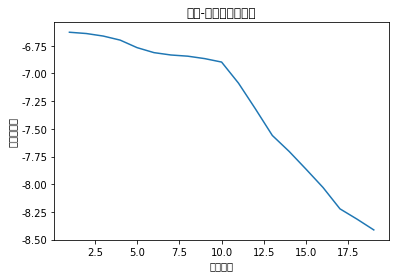

In [34]:
# 绘制困惑度折线图
x = range(1,20)  #主题范围数量
y = [perplexity(i) for i in x]
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('困惑度大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-困惑度变化情况')
plt.show()


# 一致性得分

In [35]:
import gensim
from gensim import corpora, models
import matplotlib.pyplot as plt
import matplotlib
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
 
 
 
 # 准备数据
PATH = "lda.txt"  #已经进行了分词的文档（如何分词前面的文章有介绍）

In [36]:
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()  #读取没一行文本
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
print(data_set[:10])  #输出所有分词列表


[['酒店', '孩子', '大人', '床', '卫生间', '灯', '蚊子', '位置', '大海', '车', '差'], ['家人', '木屋', '房车'], ['太阳', '斜', '帐篷'], ['差', '清洁费'], ['孩子', '碰碰车', '儿童', '乐园', '水库', '娱乐性', '房型', '湖边', '小屋', '星空', '帐篷', '房车', '房间', '设施', '空调', '山里', '寒舍', '娃'], ['天光', '白头'], ['民宿', '位置', '酒店', '环境', '管家', '需求', '前台', '亲', '硬件', '木质', '床品', '卫浴', '泳池', '河边上'], ['整体', '酒店', '山坡', '空气', '酒店', '环境', '棒', '温泉', '帐篷', '湖'], ['性价比', '会展', '中心', '角', '标准', '酒店', '大堂', '局', '设施', '绿地', '马路', '树林'], ['孩子']]


In [37]:
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
Lda = gensim.models.ldamodel.LdaModel 


In [38]:
def coherence(num_topics):
    ldamodel = Lda(corpus, num_topics=num_topics, id2word = dictionary, passes=50)  #passes为迭代次数，次数越多越精准
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_set, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    return coherence_lda



Coherence Score:  0.41272892570320796

Coherence Score:  0.4824648060609895

Coherence Score:  0.5327908811191938

Coherence Score:  0.5370194732511955

Coherence Score:  0.48256985173948574

Coherence Score:  0.5206475949923254

Coherence Score:  0.5477357410886404

Coherence Score:  0.5517298506105843

Coherence Score:  0.5049209400625198

Coherence Score:  0.48765200995375596

Coherence Score:  0.5103852092988378

Coherence Score:  0.467989445029755

Coherence Score:  0.5001674215210545

Coherence Score:  0.4696588834474838

Coherence Score:  0.5155235947052287

Coherence Score:  0.49634242831756265

Coherence Score:  0.46915556435857697

Coherence Score:  0.46524871558275005

Coherence Score:  0.47609644838481446


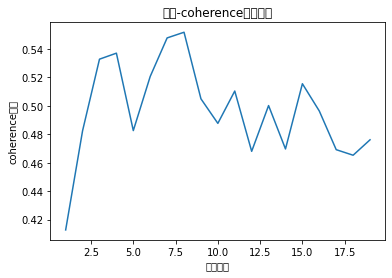

In [39]:
#一致性得分图
x = range(1,20)  #主题范围数量
y = [coherence(i) for i in x]
plt.plot(x,y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-coherence变化情况')
plt.show()
